# **Data preparation and visualization for buzzard catalog**

## Initialisation

Some manipulations on the original catalog.fits catalog is within a .fits file. First step is to convert it to .dat for zphota use

In [1]:
# import and settings
%matplotlib inline
#
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
#
import astropy.io.fits as pf
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
from astropy.visualization import MinMaxInterval
from astropy.visualization import hist

In [11]:
# load FITS image
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(base_dir)
file_path = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Final_Buzzard_training_file.fits')

file = pf.open(file_path)
file.info()


/home/hallouin/Documents/thall_2025/lephare/training_stats
Filename: /home/hallouin/Documents/thall_2025/lephare/training_stats/simulation_catalogs/buzzard_base/Final_Buzzard_training_file.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     46   111171R x 19C   [K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [12]:
file[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  152 / length of dimension 1                          
NAXIS2  =               111171 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   19 / number of table fields                         
TTYPE1  = 'BuzzID  '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'oldID   '                                                            
TFORM2  = 'K       '                                                            
TTYPE3  = 'ecatID  '        

Data check

In [13]:
# list available keywords
print(list(file[1].header.keys()))

['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'TFIELDS', 'TTYPE1', 'TFORM1', 'TTYPE2', 'TFORM2', 'TTYPE3', 'TFORM3', 'TTYPE4', 'TFORM4', 'TTYPE5', 'TFORM5', 'TTYPE6', 'TFORM6', 'TTYPE7', 'TFORM7', 'TTYPE8', 'TFORM8', 'TTYPE9', 'TFORM9', 'TTYPE10', 'TFORM10', 'TTYPE11', 'TFORM11', 'TTYPE12', 'TFORM12', 'TTYPE13', 'TFORM13', 'TTYPE14', 'TFORM14', 'TTYPE15', 'TFORM15', 'TTYPE16', 'TFORM16', 'TTYPE17', 'TFORM17', 'TTYPE18', 'TFORM18', 'TTYPE19', 'TFORM19']


In [14]:
data = file[1].data
print(data)
len(data)

[(     4,    1868, 265694, 63.197601, -41.453098, 0.038356, 2.69290e+09, 17.8313, 16.9077, 16.4431, 16.2099, 16.0613, 15.8732, 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 )
 (    14,   25650, 215939, 63.153801, -40.5882  , 0.058309, 1.31535e+10, 19.0731, 17.7448, 16.9789, 16.5288, 16.2551, 15.9531, 0.0051, 0.005 , 0.005 , 0.005 , 0.005 , 0.005 )
 (    18,   30908, 494449, 63.624401, -42.628899, 0.063701, 4.83144e+07, 21.638 , 21.0106, 20.8286, 20.6283, 20.6552, 20.528 , 0.0068, 0.0051, 0.005 , 0.0051, 0.0052, 0.0064)
 ...
 (419671, 4388425, 409494, 88.590202, -40.097801, 1.89492 , 2.98567e+09, 26.4747, 26.1712, 25.7381, 25.6059, 25.1522, 25.2944, 0.2386, 0.0653, 0.0439, 0.0671, 0.1   , 0.251 )
 (419672, 4398717, 151507, 88.5233  , -40.1115  , 1.89138 , 4.76295e+10, 28.1495, 27.4489, 26.9593, 26.5954, 25.571 , 25.7169, 0.8567, 0.2127, 0.1135, 0.1353, 0.1316, 0.2417)
 (419682, 5237640, 332585, 88.457001, -40.0756  , 1.96979 , 4.79034e+09, 27.6323, 27.1984, 26.3987, 26.0769, 25.6667, 26

111171

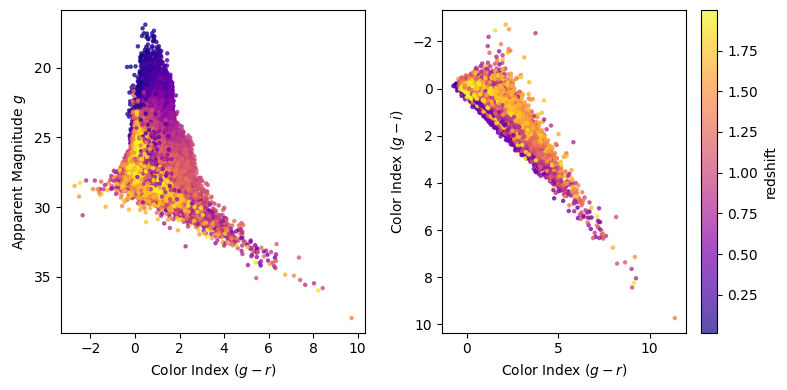

In [15]:
# plot magnitude
filtered_data = data[data['LSSTg'] < 50 ]
filtered_data = filtered_data[filtered_data['LSSTr'] < 50]
# filtered_data = filtered_data[filtered_data['redshift'] < 0.1]
# filtered_data = filtered_data[filtered_data['redshift'] > 0.06]
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(filtered_data['LSSTg']-filtered_data['LSSTr'],filtered_data['LSSTg'],s=5, c=filtered_data['redshift'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
# plt.xlim((-5,10))
# plt.ylim((15,40))
plt.gca().invert_yaxis()

plt.subplot(122)
plt.scatter(filtered_data['LSSTg']-filtered_data['LSSTi'],filtered_data['LSSTg']-filtered_data['LSSTr'],s=5, c=filtered_data['redshift'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Color Index $(g - i)$")
# plt.xlim((-5,12))
# plt.ylim((-2.5,12))
plt.gca().invert_yaxis()

plt.colorbar(label="redshift")
plt.tight_layout()
plt.show()

(array([  462.,  2844.,  5640.,  8636., 11572., 11026., 12378.,  9493.,
         8269.,  7995.,  6336.,  4919.,  4601.,  4132.,  3313.,  2642.,
         2206.,  1636.,  1479.,  1139.]),
 array([0.016282 , 0.1154609, 0.2146398, 0.3138187, 0.4129976, 0.5121765,
        0.6113554, 0.7105343, 0.8097132, 0.9088921, 1.008071 , 1.1072499,
        1.2064288, 1.3056077, 1.4047866, 1.5039655, 1.6031444, 1.7023233,
        1.8015022, 1.9006811, 1.99986  ]),
 <BarContainer object of 20 artists>)

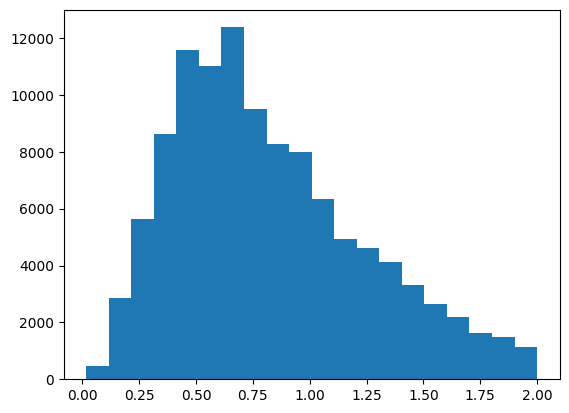

In [16]:
# Plot redshift distribution (Chi2)
plt.hist(filtered_data['redshift'],bins=20)


Convert fits to ascii for zphota

In [17]:
#(re)load fits
# load FITS image
file_path = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Final_Buzzard_training_file.fits')

file = pf.open(file_path)

data = file[1].data


columns_order = [
    'BuzzID', 
    'LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy',
    'errLSSTu', 'errLSSTg', 'errLSSTr', 'errLSSTi', 'errLSSTz', 'errLSSTy']
context = np.zeros(len(data), dtype='int')
data_array = np.vstack([[data[col] for col in columns_order],context, data['redshift']]).T

###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Final_Buzzard_training_file.dat')
formats = ['%d'] + ['%.5f'] * 12 + ['%d'] + ['%.5f']
np.savetxt(CAT_IN_PATH, data_array, fmt=formats)


In [18]:
### Same but with shuffle since sources are classified in ascending order redshift
#useful for tests on shortlists

file = pf.open(file_path)

data = file[1].data
columns_order = [
    'BuzzID', 
    'LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy',
    'errLSSTu', 'errLSSTg', 'errLSSTr', 'errLSSTi', 'errLSSTz', 'errLSSTy']

data = data[data['LSSTg'] > 10]

context = np.zeros(len(data), dtype='int')
data_array = np.vstack([[data[col] for col in columns_order],context, data['redshift']]).T
data_shuffled = pd.DataFrame(data_array).sample(frac=1)
print(data_shuffled)

###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Shuffle_Buzzard_training_file.dat')
formats = ['%d'] + ['%.5f'] * 12 + ['%d'] + ['%.5f']
np.savetxt(CAT_IN_PATH, data_shuffled, fmt=formats)

              0        1        2        3        4        5        6   \
838       2996.0  25.6879  24.6608  24.0406  23.7289  23.6852  23.5189   
23258    87746.0  21.9936  21.2677  20.5429  20.3621  20.0675  20.0975   
68755   258981.0  26.6315  26.9612  26.1472  25.9333  25.8308  25.6333   
106930  403445.0  27.8596  27.4495  27.1761  26.6829  26.2727  25.4913   
82541   311170.0  99.0000  99.0000  27.7886  26.6148  25.9198  25.6392   
...          ...      ...      ...      ...      ...      ...      ...   
89742   338492.0  24.1473  23.7167  23.2256  23.0787  22.9438  22.8608   
66268   249734.0  24.1845  24.0384  24.1821  24.0614  24.3794  24.3269   
109718  414119.0  25.3867  25.0924  24.6278  24.1059  23.7166  23.3624   
2788     10558.0  26.9909  26.9506  26.2672  26.0472  25.7190  25.8659   
96317   363422.0  26.3135  24.6641  23.0610  21.9204  21.5066  21.1835   

            7       8       9       10      11      12   13        14  
838     0.1400  0.0192  0.0102  0.0136 

In [ ]:
###Shuffle file from ascii format
file_dat_path = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat')
file_dat = np.loadtxt(file_dat_path)
file_dat_shuffled = pd.DataFrame(file_dat).sample(frac=1)
print(file_dat_shuffled)

###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Shuffle175_Buzzard_training_file.dat')
formats = ['%d'] + ['%.5f'] * 12 + ['%d'] + ['%.5f']
np.savetxt(CAT_IN_PATH, file_dat_shuffled, fmt=formats)


FileNotFoundError: /home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat not found.

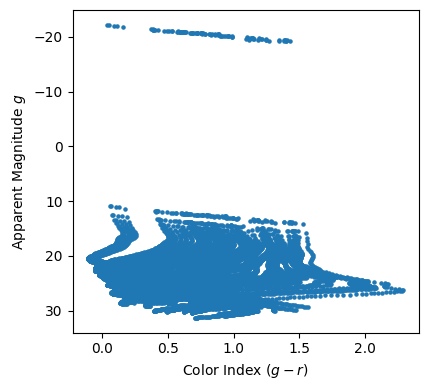

In [23]:
#files
base_dir = '/home/hallouin/Documents/thall_2025/lephare/'

mag_gal_path = os.path.join('/home/hallouin/.cache/lephare/work/lib_mag/buzzard_mags.dat')
mag_gal = np.loadtxt(mag_gal_path)
mag_gal_g = mag_gal[:,8][1:]
mag_gal_r = mag_gal[:,9][1:]
# plot mag_gal vs mag_in
# mag_gal_g = mag_gal_g[mag_gal_g > 0]
# mag_gal_r = mag_gal_r[mag_gal_g > 0]

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(mag_gal_g-mag_gal_r,mag_gal_g,s=5)#, c=filtered_data['redshift'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
plt.gca().invert_yaxis()

# plt.colorbar(label="redshift")
plt.tight_layout()
plt.show()
